In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [62]:
# Add the python path to the folder containing some custom packages.
import sys
sys.path.insert(0, "../../packages/")
from TsIP.TsIP import TsIP

In [63]:
# Set default sizes for figures.
plt.style.use("default") # style matplotlib
plt.rc("axes", labelsize = 15) # fontsize of the x and y labels
plt.rc("axes", titlesize = 15) # fontsize of the axes title
plt.rc("xtick", labelsize = 15) # fontsize of the tick labels
plt.rc("ytick", labelsize = 15) # fontsize of the tick labels
plt.rc("legend", fontsize = 13) # legend fontsize

In [64]:
#PROJECT_ROOT = "./RESULTS/Review 2"
PROJECT_ROOT = "./RESULTS/2° Analysis"

# Forecasting

In [111]:
COUNTRY = "Cameroon"

DIR_RESULTS = f"{PROJECT_ROOT}/{COUNTRY}/standard/out_test"
OUTPUT_FOLDER = f"{PROJECT_ROOT}/{COUNTRY}/standard/out_test/images"

if not os.path.exists(OUTPUT_FOLDER):
    os.makedirs(OUTPUT_FOLDER)

In [112]:
# Load forecasting results.
xls = pd.ExcelFile(DIR_RESULTS + "/forecast.xlsx")

forecast_splits = dict()
for i, split in enumerate(xls.sheet_names):
    if i == 0:
        df = pd.read_excel(xls, split, index_col = 0, header = [0, 1, 2])
    else:
        forecast_split = pd.read_excel(xls, split, index_col = 0, header = [0, 1, 2])
        forecast_split.drop("FCG", axis = 1, level = 2, inplace = True)
        forecast_split = pd.concat([df, forecast_split], axis = 1).sort_index(axis = 1, level = [0, 1, 2])
        # Save the predictions.
        forecast_splits[split] = forecast_split
    
forecast_splits = pd.concat(forecast_splits, axis = 1)
forecast_splits.columns.names = ["Split", "Country", "AdminStrata", "Prediction"]
forecast_splits.head()

Split         Split 1                                                    \
Country      Cameroon                                                     
AdminStrata   Adamawa                  Central                     East   
Prediction        FCG Forecast Naive       FCG Forecast Naive       FCG   
Datetime                                                                  
2019-06-30   26.79795      NaN   NaN  19.64846      NaN   NaN  19.17930   
2019-07-01   27.08333      NaN   NaN  19.14373      NaN   NaN  22.09802   
2019-07-02   25.39063      NaN   NaN  18.46608      NaN   NaN  20.75929   
2019-07-03   24.86611      NaN   NaN  18.09249      NaN   NaN  19.79969   
2019-07-04   24.41773      NaN   NaN  18.52908      NaN   NaN  19.20777   

Split                                 ...    Split 5                           \
Country                               ...   Cameroon                            
AdminStrata                Far-North  ... North-West     South                  
Prediction  Forecast Naive       FCG  ...      Naive       FCG Forecast Naive   
Datetime                              ...                                       
2019-06-30       NaN   NaN  16.05136  ...        NaN  19.98382      NaN   NaN   
2019-07-01       NaN   NaN  15.61280  ...        NaN  19.55661      NaN   NaN   
2019-07-02       NaN   NaN  14.91424  ...        NaN  18.66969      NaN   NaN   
2019-07-03       NaN   NaN  14.56664  ...        NaN  18.05556      NaN   NaN   
2019-07-04       NaN   NaN  14.20455  ...        NaN  20.09979      NaN   NaN   

Split                                                           
Country                                                         
AdminStrata South-West                     West                 
Prediction         FCG Forecast Naive       FCG Forecast Naive  
Datetime                                                        
2019-06-30    49.43560      NaN   NaN  39.07455      NaN   NaN  
2019-07-01    49.05338      NaN   NaN  37.46919      NaN   NaN  
2019-07-02    50.59499      NaN   NaN  37.77065      NaN   NaN  
2019-07-03    51.40874      NaN   NaN  38.15074      NaN   NaN  
2019-07-04    51.34353      NaN   NaN  37.79831      NaN   NaN  

[5 rows x 150 columns]

In [113]:
TsIP(forecast_splits).interactive_plot_df(title = "", matplotlib = False, style = "lines", comparison = False)

RadioButtons(description='Select:', options=('Time series', 'Missing values'), value='Time series')

Output()

In [114]:
def plot_prediction(df, split, country, province, ax):
    df = df[split][country][province]
    # Add the time-series to the figure.
    df.columns.name = None
    last_date = df["Forecast"].last_valid_index()
    df = df.loc[:last_date]
    for column in df.columns: 
        if column == "FCG":
            df[column].plot(ax = ax, label = "_", style = ":", c = "black", alpha = 0.5)
        elif column == "Naive":
            df[column].plot(ax = ax, label = "naive", style = "-", c = sns.color_palette("tab10")[0], legend = False)
        else:
            df[column].plot(ax = ax, label = "model", style = "-", c = sns.color_palette("tab10")[1], legend = False)
            
    # Set legend.
    ax.legend(title = df.columns.name, loc = "best")
    # Set axis names.
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.autoscale()

In [119]:
# 2° Analysis - Partial - 5 splits.
# Some example of predictions for visualization (paper).
REGIONS_PRED = {"Yemen": {0: ["Split 10", "Amanat Al Asimah"], 1:["Split 12", "Abyan"]}, 
                "Syria": {0: ["Split 8", "Damascus"], 1:["Split 9", "Tartous"]}, 
                "Mali": {0: ["Split 5", "Koulikoro"], 1:["Split 3", "Sikasso"]}, 
                "Nigeria": {0: ["Split 4", "Yobe"], 1:["Split 4", "Borno"]}, 
                "Cameroon": {0: ["Split 5", "Central"], 1:["Split 3", "North-West"]}, 
                "Burkina Faso": {0: ["Split 4", "Boucle-Du-Mouhoun"], 1:["Split 5", "Centre-Ouest"]}}
TYPE_ANALYSIS = "partial_5_splits"

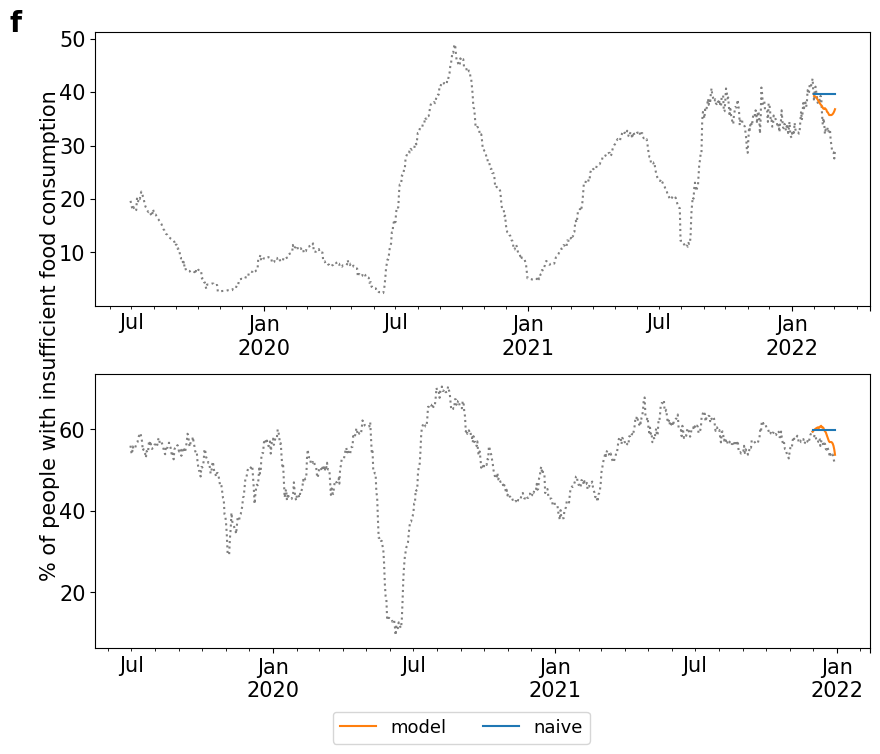

In [120]:
# Plot for paper.
fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (10, 8))    
fig.subplots_adjust(hspace = .25)

plot_prediction(forecast_splits, REGIONS_PRED[COUNTRY][0][0], COUNTRY, REGIONS_PRED[COUNTRY][0][1], axs[0])
plot_prediction(forecast_splits, REGIONS_PRED[COUNTRY][1][0], COUNTRY, REGIONS_PRED[COUNTRY][1][1], axs[1])

fig.text(0.07, 0.5, "% of people with insufficient food consumption", va = "center", rotation = "vertical", 
         fontdict = {"size": 15})
axs.flatten()[0].get_legend().remove()
axs.flatten()[-1].legend(bbox_to_anchor = (0.65, -0.2), ncol = 2)

axs[0].text(-0.11, 1., "f", transform = axs[0].transAxes, 
            size = 20, weight='bold')

fig.savefig(OUTPUT_FOLDER + f"/predictions_{TYPE_ANALYSIS}.png", bbox_inches = "tight", dpi = 300)